# Aprendizagem de maquinas

Bloco de notas utilizado ao longo da disciplina que servirá de trabalho para a aprovação.

## Regressão linear Simples

O objetivo é ver a relação entre a bolsa de valores (Ibovespa) e o Dolar.

### Importação dos dados

Para importar os dados, utilizaremos a biblioteca do *Yahoo Finances* para podemos pegar os dados. 
Iremos pegar as cotações:

* Do Ibovespa ('BOVA11.SA');
* Dolar em relação ao Real ('USDBRL=X');

In [3]:
import yfinance as yf

ibov = yf.Ticker('BOVA11.SA')
dolar = yf.Ticker('USDBRL=X')

In [4]:
ibov_hist = ibov.history(period='max')
display("Serie historica do Ibovespa")
ibov_hist

'Serie historica do Ibovespa'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-04-17 00:00:00-03:00,45.700001,45.980000,45.599998,45.849998,274700,0.0,0.0
2009-04-20 00:00:00-03:00,44.790001,44.900002,44.070000,44.419998,265800,0.0,0.0
2009-04-22 00:00:00-03:00,44.610001,45.240002,44.509998,44.990002,234800,0.0,0.0
2009-04-23 00:00:00-03:00,45.189999,45.900002,44.860001,45.900002,305900,0.0,0.0
2009-04-24 00:00:00-03:00,46.169998,46.849998,46.099998,46.689999,325600,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-02 00:00:00-03:00,112.639999,113.139999,111.230003,111.489998,4050713,0.0,0.0
2023-10-03 00:00:00-03:00,111.180000,111.529999,109.660004,109.820000,7808004,0.0,0.0
2023-10-04 00:00:00-03:00,110.160004,110.680000,109.580002,110.180000,3106290,0.0,0.0


In [5]:
dolar_hist = dolar.history(period='max')
display("Serie historica do Dolar (em valor de Real)")
dolar_hist

'Serie historica do Dolar (em valor de Real)'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01 00:00:00+00:00,2.9460,2.9460,2.923000,2.9230,0,0.0,0.0
2003-12-02 00:00:00+00:00,2.9230,2.9310,2.923000,2.9310,0,0.0,0.0
2003-12-03 00:00:00+00:00,2.9310,2.9360,2.926000,2.9310,0,0.0,0.0
2003-12-04 00:00:00+00:00,2.9310,2.9430,2.931000,2.9430,0,0.0,0.0
2003-12-05 00:00:00+00:00,2.9430,2.9480,2.934000,2.9340,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-03 00:00:00+01:00,5.0615,5.1346,5.059925,5.0615,0,0.0,0.0
2023-10-04 00:00:00+01:00,5.1663,5.1759,5.122887,5.1663,0,0.0,0.0
2023-10-05 00:00:00+01:00,5.1546,5.1849,5.135422,5.1546,0,0.0,0.0


Primeiramente, iremos ver graficamente os dados dos indices, relacionando a data, com o valor de fechamento.

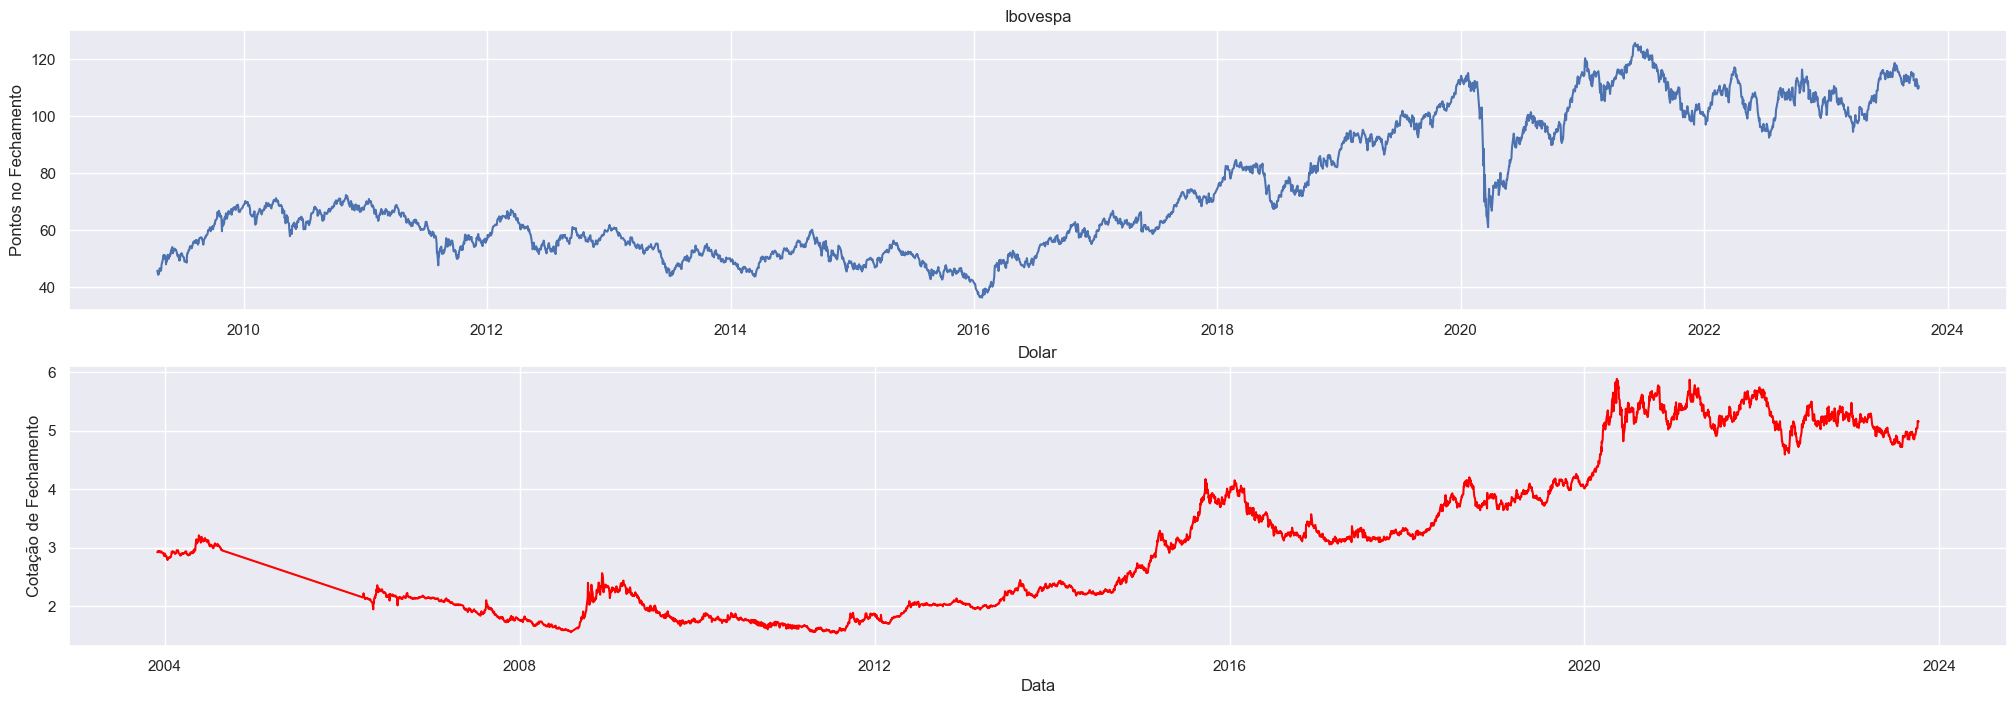

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(25, 8))
plt.subplot(2, 1, 1)
plt.title('Ibovespa')
plt.ylabel('Pontos no Fechamento')
plt.plot(ibov_hist['Close'], label='IBOV')

plt.subplot(2, 1, 2)
plt.title('Dolar')
plt.xlabel('Data')
plt.ylabel('Cotação de Fechamento')
plt.plot(dolar_hist['Close'], color='red')

plt.show()

### Tratamento dos dados

Nesse passo, iremos fazer uma união dos dados, visando tirar linhas que não tenham todos os valores e garantir que estejam com a mesma data (uma unica referencia).

In [7]:
import pandas as pd

dolar_hist = dolar.history(period='max')
ibov_hist = ibov.history(period='max')

ibov_hist.index = ibov_hist.index.strftime('%Y-%m-%d')
ibov_hist = ibov_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
dolar_hist.index = dolar_hist.index.strftime('%Y-%m-%d')
dolar_hist = dolar_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

df_ibov_dolar = pd.merge(ibov_hist, dolar_hist, left_index=True, right_index=True)
df_ibov_dolar.columns =['IBOV', 'DOLAR']
plt.show()
df_ibov_dolar

,IBOV,DOLAR
Date,,
2009-04-17,45.849998,2.1826
2009-04-20,44.419998,2.2303
2009-04-22,44.990002,2.2010
2009-04-23,45.900002,2.2075
2009-04-24,46.689999,2.1935
...,...,...
2023-10-02,111.489998,5.0428
2023-10-03,109.820000,5.0615
2023-10-04,110.180000,5.1663


### Correlação entre os dados

Iremos agora, avaliar a correlação dos dados, no caso o fechamento do dolar e do ibovespa. Para isso, num primeiro momento vamos criar um **"mapa de calor"**.

<Axes: >

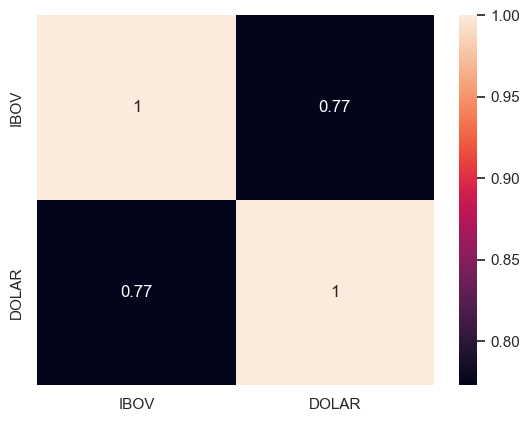

In [8]:
sns.heatmap(df_ibov_dolar.corr(), annot=True)

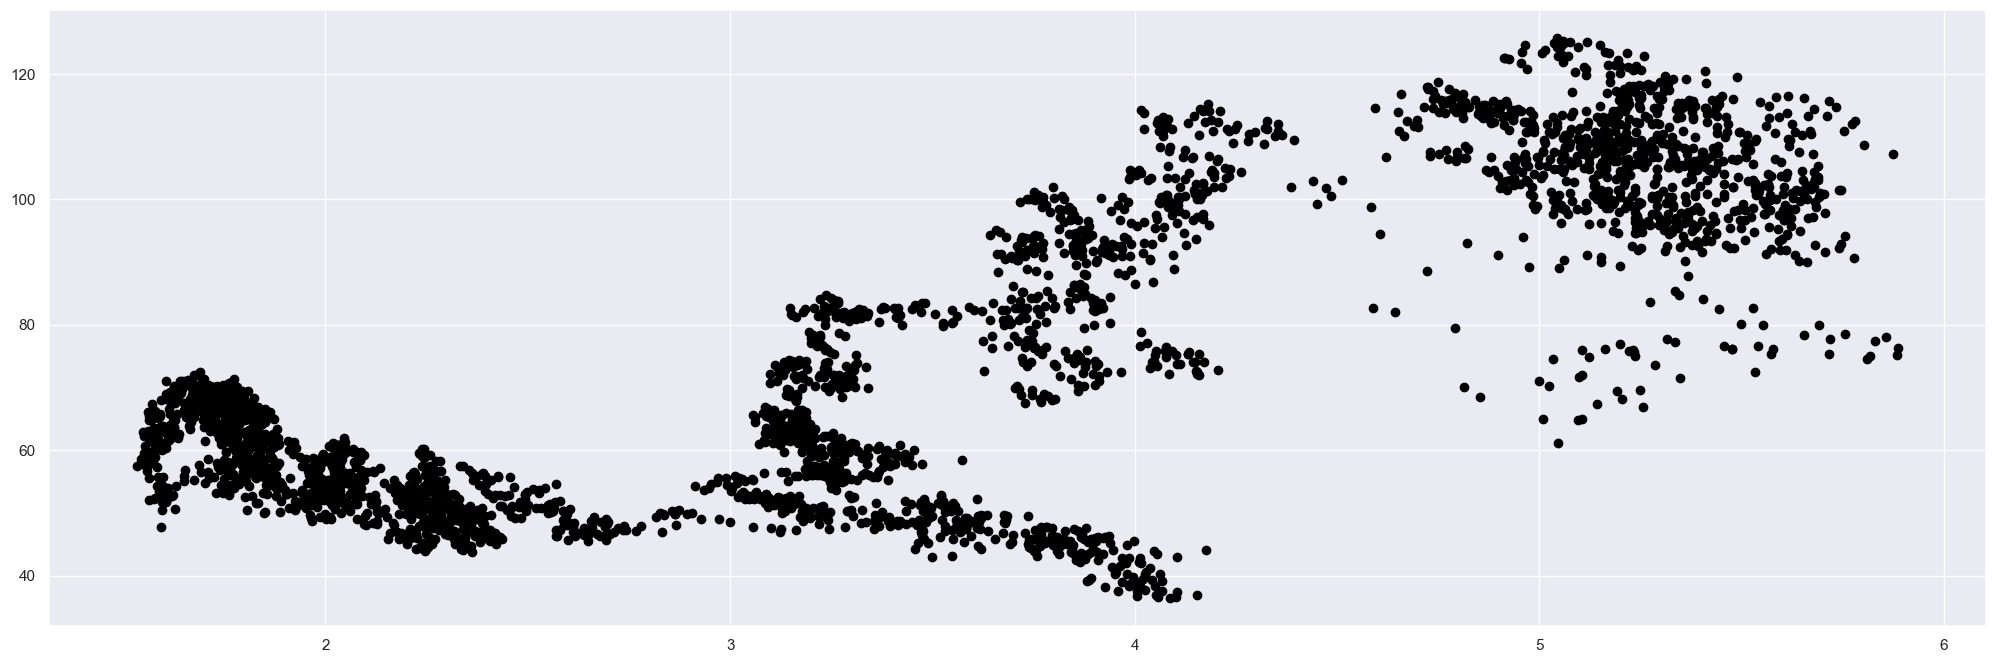

In [9]:
plt.figure(figsize=(25, 8))
plt.plot(df_ibov_dolar['DOLAR'], df_ibov_dolar['IBOV'],'o', color='black')

Para facilitar a visualização, será feita janelas de visualização de um ano. 


<Axes: xlabel='Date'>

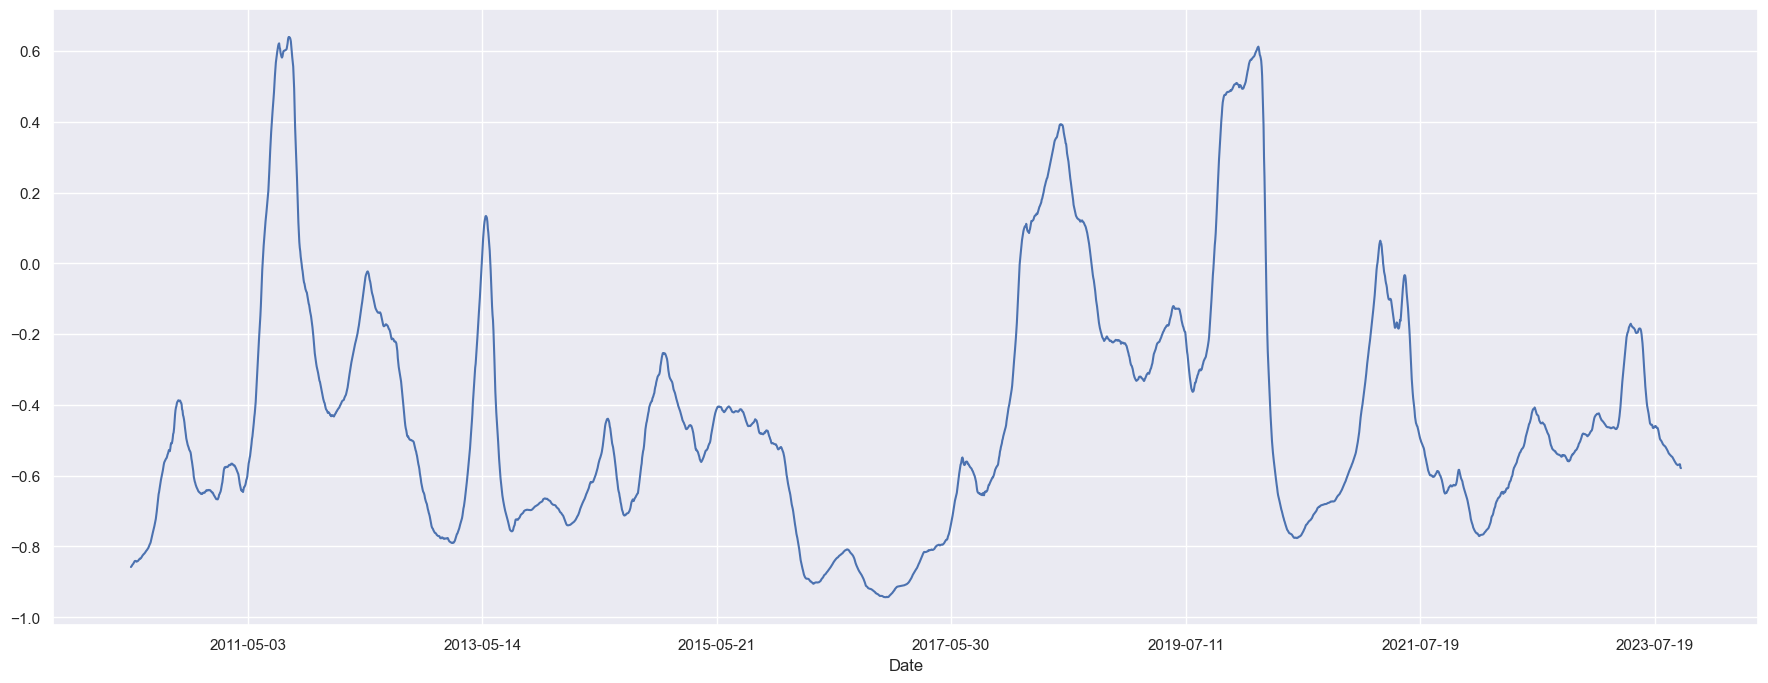

In [10]:
df_ibov_dolar['DOLAR'].rolling(252).corr(df_ibov_dolar['IBOV']).plot(figsize=(22,8))

De Maneira geral, o que vemos é que existe momentos que se tem alta correlação positiva e vales com alta correlação negativa. Lembrando que o ponto onde indica onde não existe correlação é o entorno do zero.

### Aplicando a Regressão Linear ao dados

Iremos dividir em dois momentos, no primeiro usaremos o *dataframe* todo e num segundo momento apenas uma janela. Para isso vamos usar a ferramenta do [*Scikit-learn*](https://scikit-learn.org/stable/).

#### Regressão Linear de todo o DataFrame

Como já temos os dados e base, basta:
* Separar os dados de treinamento;
* Dados de validação;
* Aplicar o metodo;
* Validar saida;

In [47]:
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def reg_linear(vet_indept, vet_dept):
    x_train , x_test , y_train , y_test = train_test_split(vet_indept, vet_dept, test_size=0.20, random_state=42)

    regr = linear_model.LinearRegression()

    regr.fit(x_train, y_train)

    y_pred =regr.predict(x_train)

    mean_squat_error = mean_squared_error(y_train, y_pred)
    coff_of_det = r2_score(y_train, y_pred)

    y_pred_test =regr.predict(x_test) 

    mean_squat_error_test = mean_squared_error(y_test, y_pred_test)
    coff_of_det_test = r2_score(y_test, y_pred_test)

    coeff = regr.coef_
    intercept = regr.intercept_

    #Plot outputs
    plt.figure(figsize=(25, 15))
    plt.subplot(2, 1, 1)
    plt.title('Treinamento')
    plt.ylabel('Pontos no Fechamento')
    plt.xlabel('Valor do dolar')
    plt.scatter(x_train, y_train, color="black")
    plt.plot(x_train, y_pred, color="blue", linewidth=3)

    plt.subplot(2, 1, 2)
    plt.title('Validação')
    plt.ylabel('Pontos no Fechamento')
    plt.xlabel('Valor do dolar')
    plt.scatter(x_test, y_test, color="black")
    plt.plot(x_train, y_pred, color="red", linewidth=3)

    plt.show()
    dict_train = {'mean_squat_error': mean_squat_error, 'coff_of_det': coff_of_det}
    dict_test = {'mean_squat_error': mean_squat_error_test, 'coff_of_det': coff_of_det_test}
    dict_coff = {"coeff": coeff, "intercept": intercept}

    return dict([('Treinamento', dict_train), ('Validacao', dict_test), ('Coeficiente', dict_coff)])

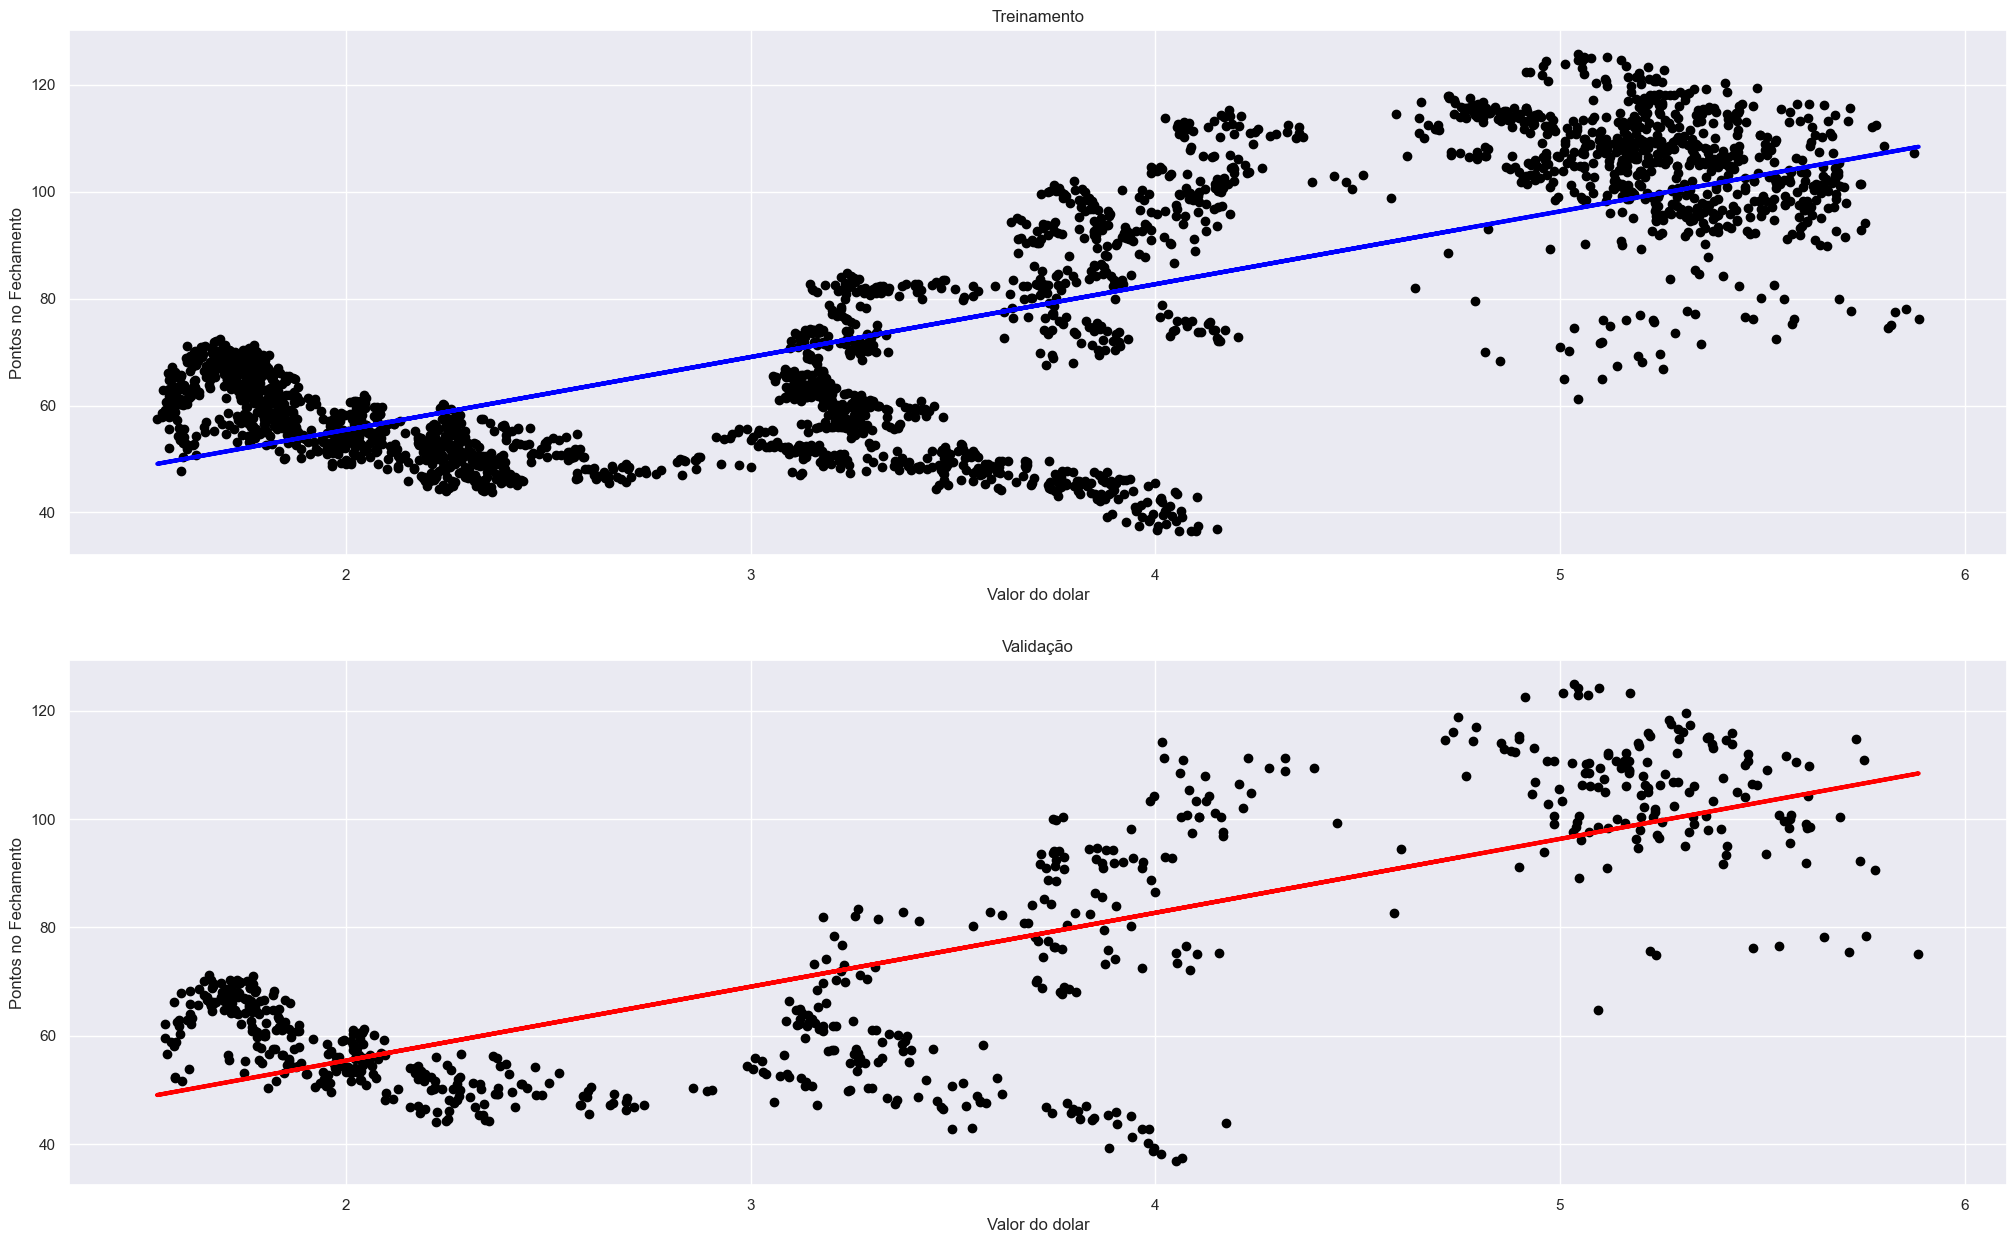

In [58]:
ret = reg_linear(df_ibov_dolar[['DOLAR']].to_numpy(), df_ibov_dolar[['IBOV']].to_numpy())

Como vimos, para um tempo muito grande, a resposta é pouco signficativa, devido a aulta dispersão do dados.

#### Regressão Linear para pedaços do DataFrame

Iremos pegar duas amostras menores de tempo e avaliarmos se conseguimos ter melhores respostas para menores periodos de tempo. Com isso iremos:
* Separar em dois conjuntos;
* Separar os dados de treinamento;
* Dados de validação;
* Aplicar o metodo;
* Validar saida;


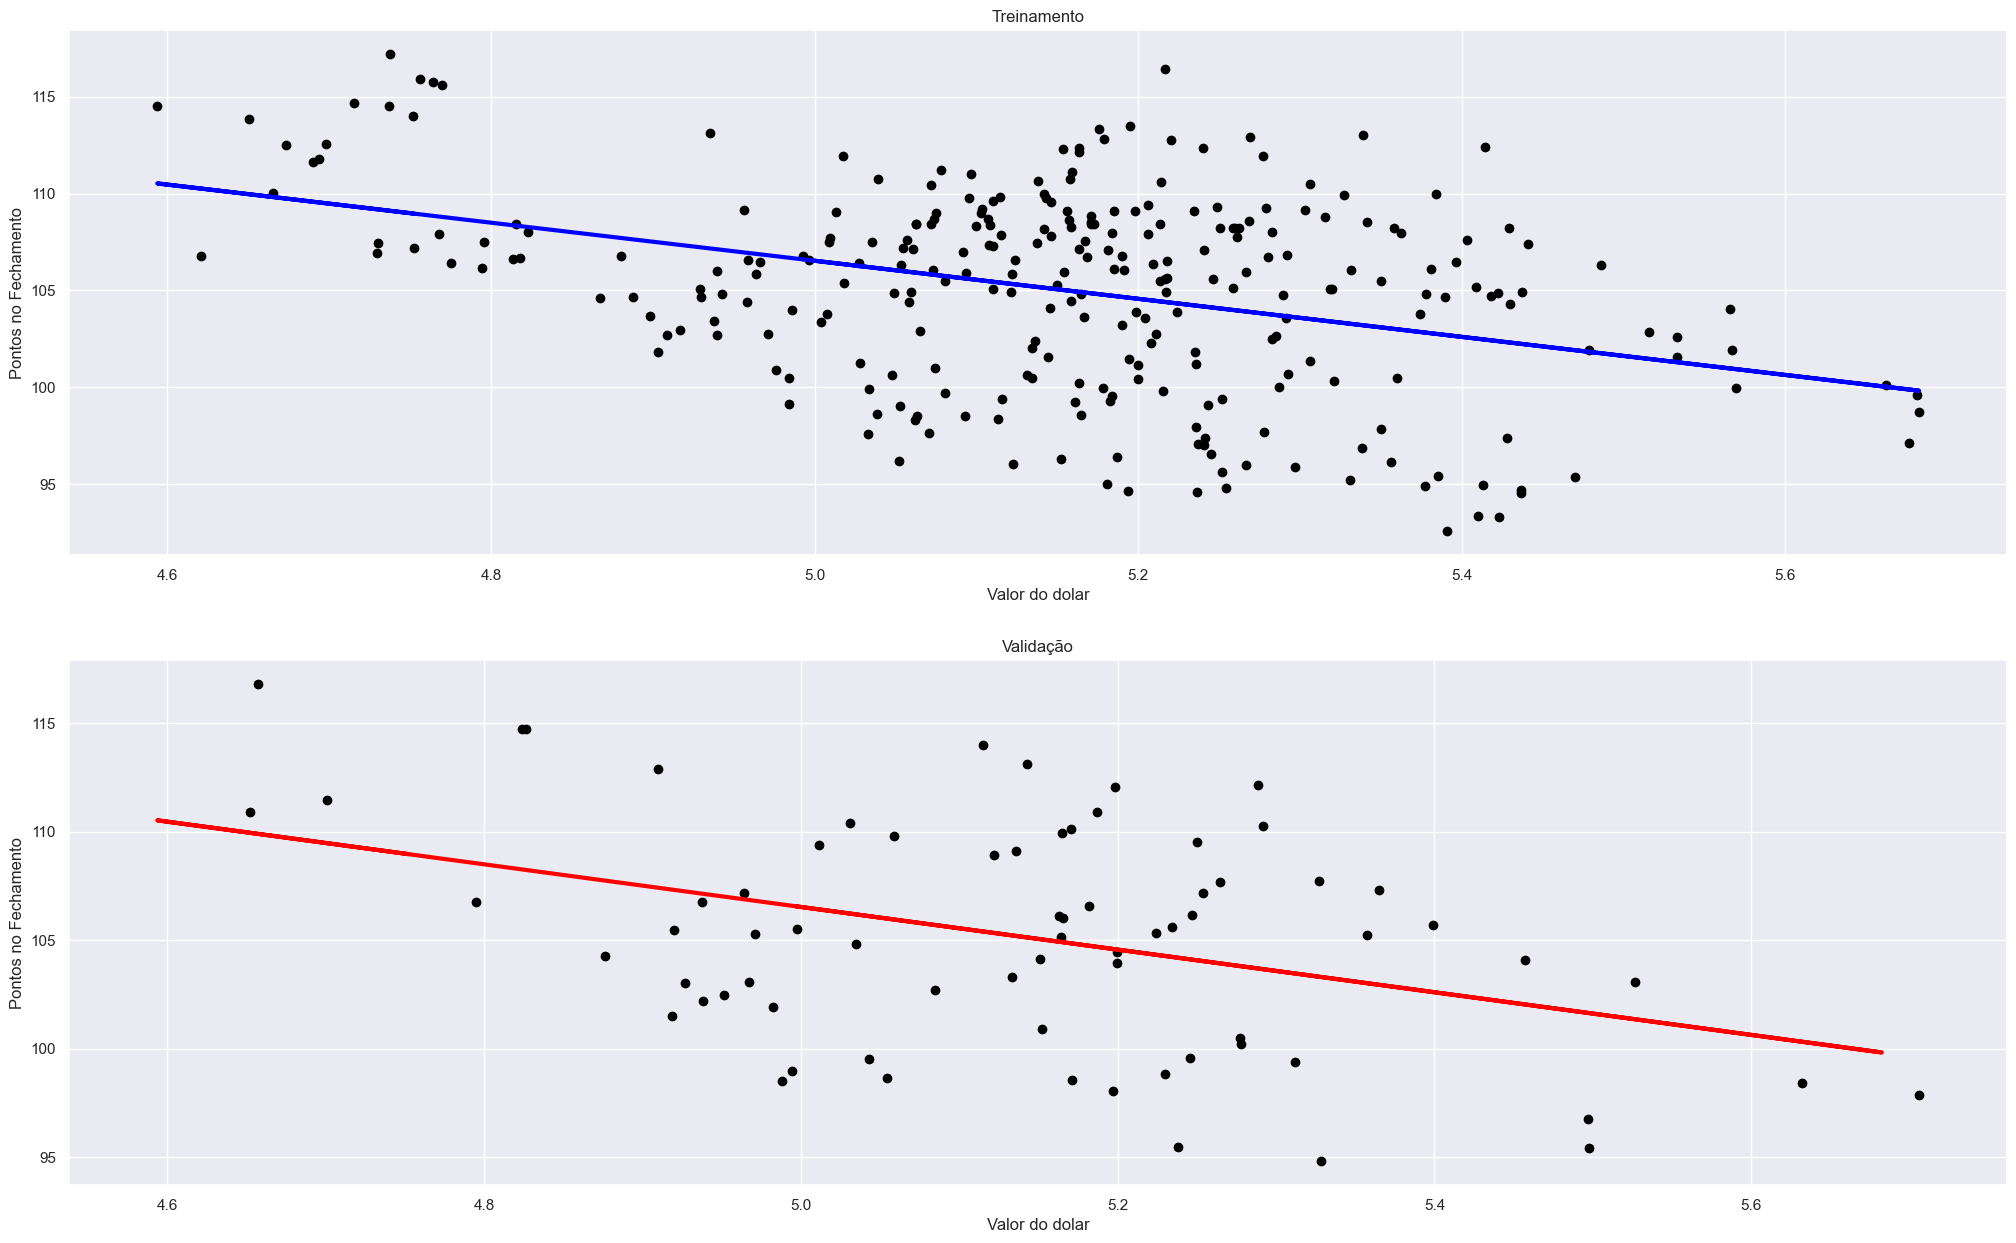

In [50]:
new_df = df_ibov_dolar.loc['2022-01-03':'2023-06-05']

ret = reg_linear(new_df[['DOLAR']].to_numpy(), new_df[['IBOV']].to_numpy())

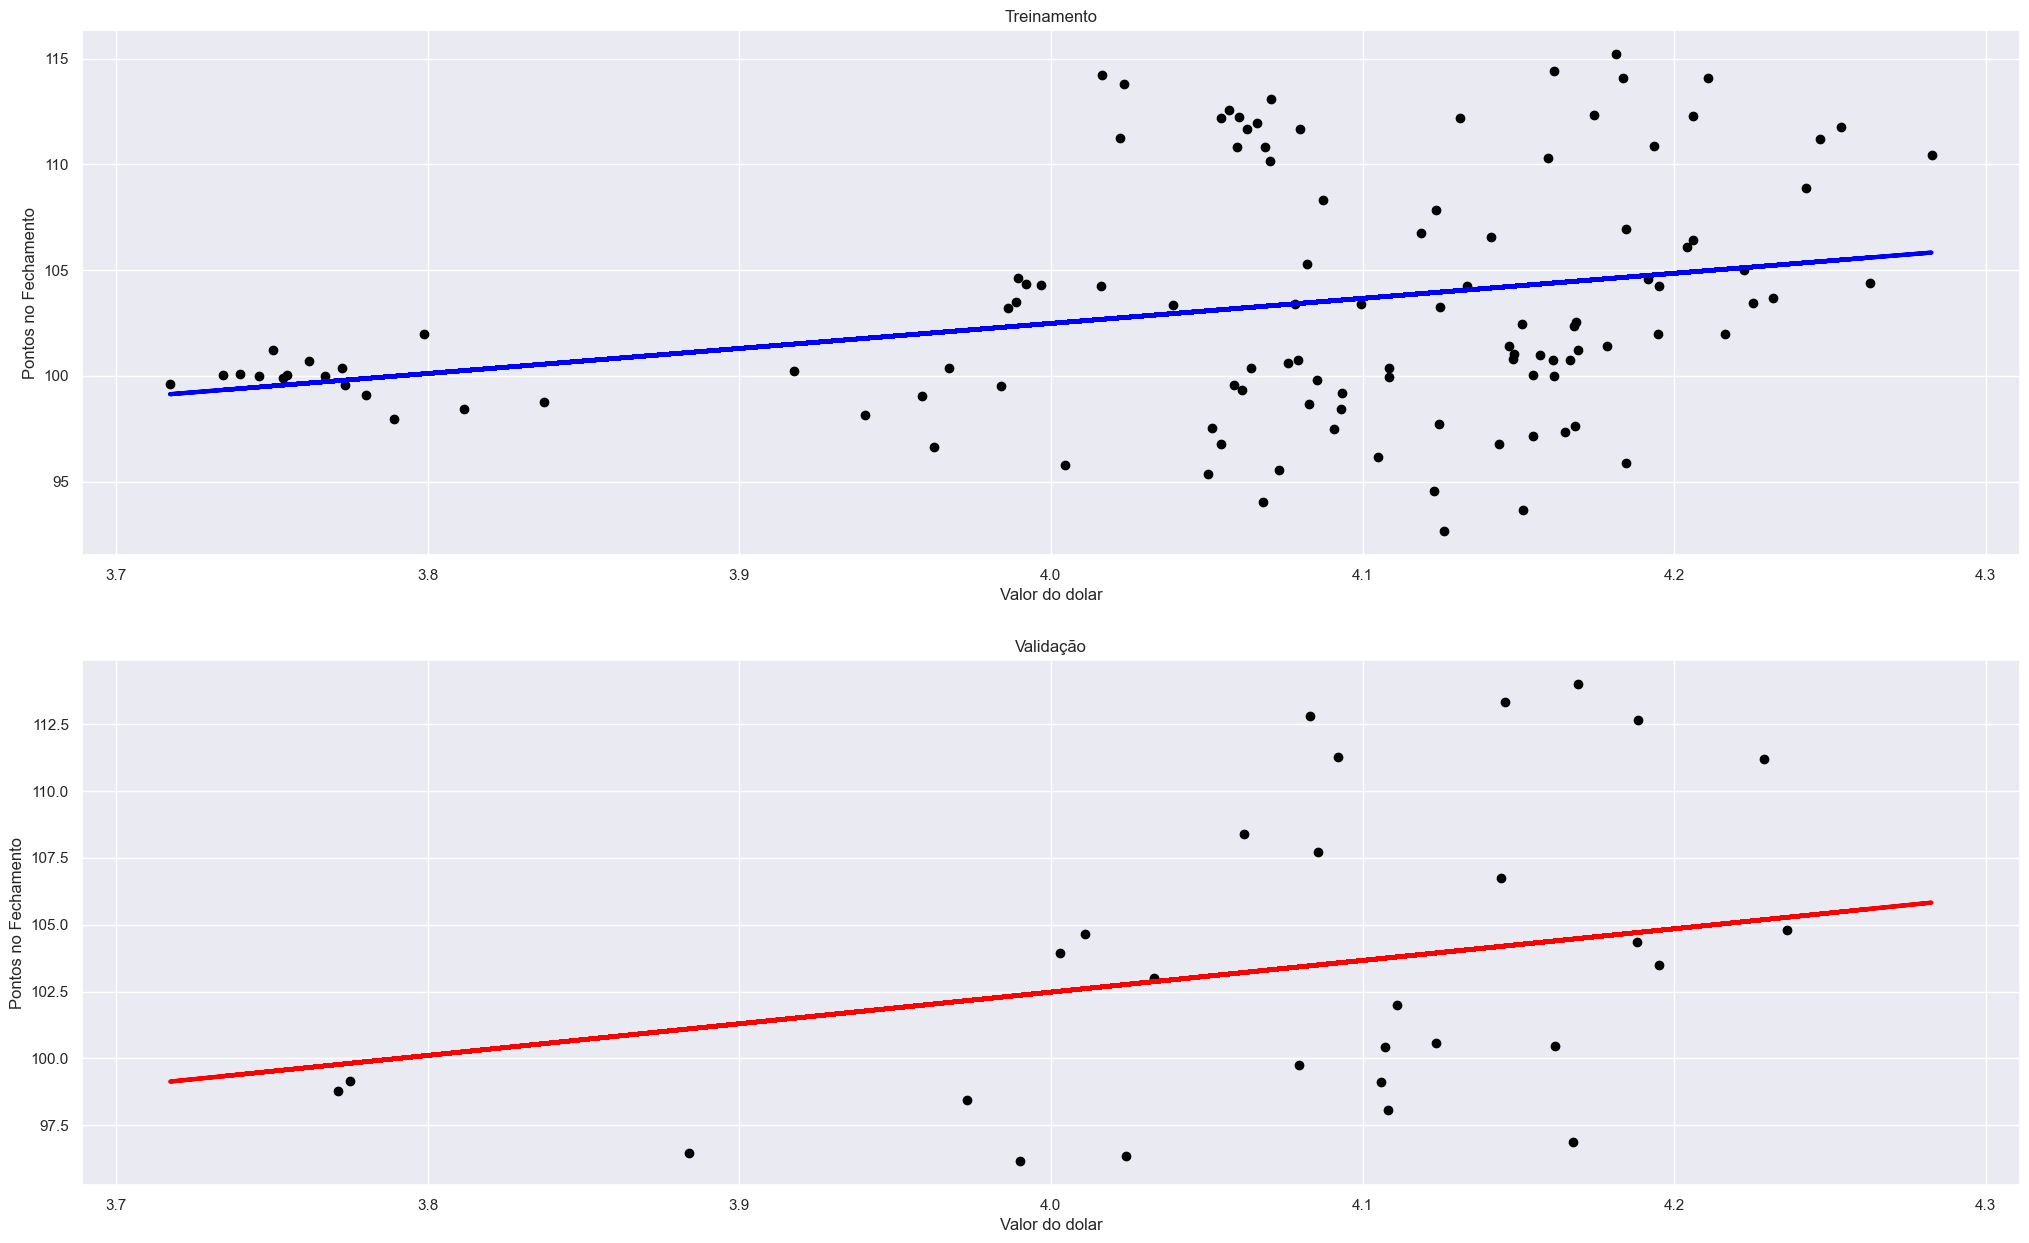

In [57]:
new_df = df_ibov_dolar.loc['2019-07-10':'2020-02-05']

ret = reg_linear(new_df[['DOLAR']].to_numpy(), new_df[['IBOV']].to_numpy())
